In [45]:
#カレントディレクトリ
%pwd

'/content/drive/MyDrive/marketing-demo/01'

In [46]:
#カレントディレクトリに含まれるファイルとディレクトリを表示する
%ls

 animation.gif           Mall_Customers.csv  'training.ipynb のコピー'
 cluster_animation.gif   training.ipynb


In [47]:
# googleドライブへの接続
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
# フォルダが増えたことを確認
%ls

 animation.gif           Mall_Customers.csv  'training.ipynb のコピー'
 cluster_animation.gif   training.ipynb


In [49]:
%cd ./drive/My Drive/marketing-demo/


[Errno 2] No such file or directory: './drive/My Drive/marketing-demo/'
/content/drive/My Drive/marketing-demo/01


In [50]:
%cd ./01


[Errno 2] No such file or directory: './01'
/content/drive/My Drive/marketing-demo/01


Import modules, packages and libraries.

In [51]:
import seaborn as sns #for drawing
import matplotlib.pyplot as plt #for drawing
%matplotlib inline
import statsmodels.formula.api as smf #for regression analysis
import pandas as pd #data management
import numpy as np #data management

In [52]:
!pip install japanize_matplotlib
import japanize_matplotlib #matplotlibでの日本語の表示

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Check the features

In [53]:
#Read dataset
df = pd.read_csv('Mall_Customers.csv')

In [54]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Basic Statistics/Correlation

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df.set_index('CustomerID',inplace = True)

In [73]:
 df.select_dtypes(include=['float64', 'int64']).corr()

,Age,Annual_Income_(k$),Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income_(k$),-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


In [74]:
df.corr()

,Age,Annual_Income_(k$),Spending_Score,Genre_Female,Genre_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual_Income_(k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending_Score,-0.327227,0.009903,1.000000,0.058109,-0.058109
Genre_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Genre_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


<Axes: >

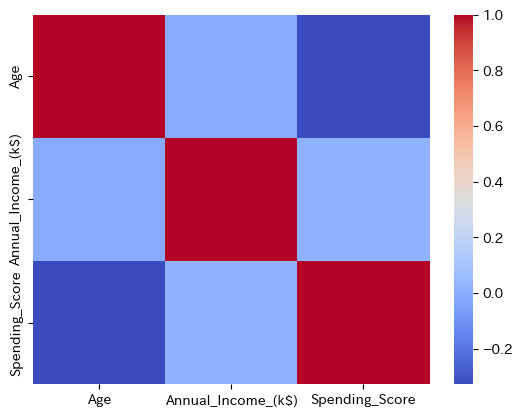

In [75]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

### Check your analysis with a scatterplot

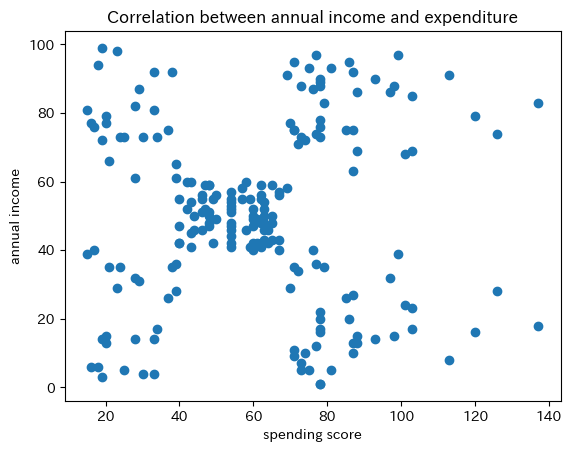

In [76]:
plt.scatter(x=df["Annual_Income_(k$)"],y=df["Spending_Score"])
plt.title("Correlation between annual income and expenditure")
plt.xlabel("spending score")
plt.ylabel("annual income")
plt.show()

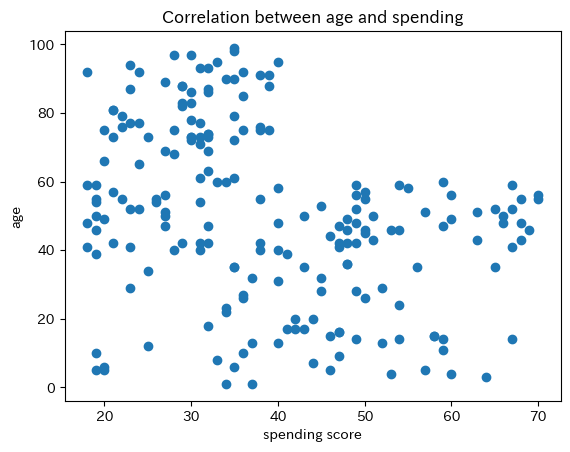

In [77]:
plt.scatter(x=df["Age"],y=df["Spending_Score"])
plt.title("Correlation between age and spending")
plt.xlabel("spending score")
plt.ylabel("age")
plt.show()

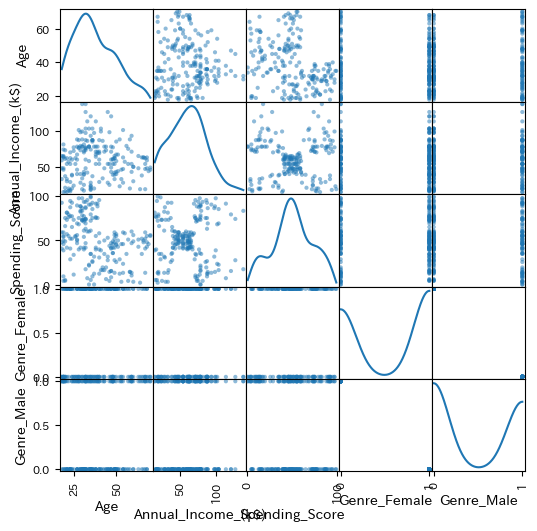

In [78]:
pd.plotting.scatter_matrix(df, alpha = 0.5, figsize = (6, 6), diagonal = "kde");

At first, I thought I could do multiple regression analysis, but clustering seems to be more appropriate.

# kmeans

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

特徴的なデータがありました。最初は重回帰分析を行えるかなと考えていましたが、クラスタリングが適切のようなです。

# kmeans 

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [80]:
df= pd.get_dummies(df)
df_1=df.drop('Genre_Male', axis=1)
df_2= df_1.rename(columns={'Genre_Female': 'Gender'}) #male 0 famale

In [81]:
df_2.corr()

,Age,Annual_Income_(k$),Spending_Score,Gender
Age,1.000000,-0.012398,-0.327227,-0.060867
Annual_Income_(k$),-0.012398,1.000000,0.009903,-0.056410
Spending_Score,-0.327227,0.009903,1.000000,0.058109
Gender,-0.060867,-0.056410,0.058109,1.000000


In [82]:
df_2.head()

,Age,Annual_Income_(k$),Spending_Score,Gender
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,1
4,23,16,77,1
5,31,17,40,1


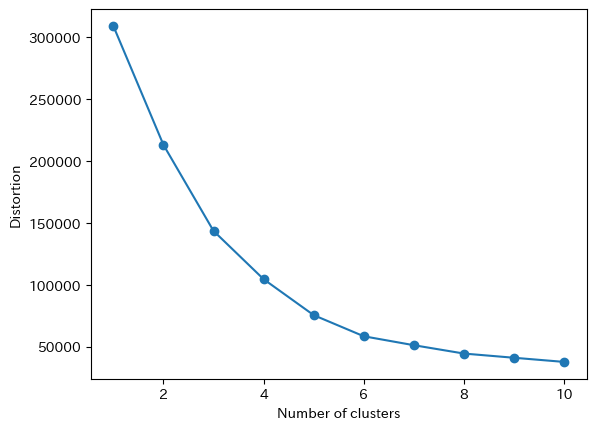

In [83]:
# Determination of optimal number of clusters by elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_2)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

After the 5th, it will be gradual. Let's analyze with K=5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Age  Annual_Income_(k$)  Spending_Score  Gender  Cluster
CustomerID                                                          
1            19                  15              39       0        0
2            21                  15              81       0        4
3            20                  16               6       1        0
4            23                  16              77       1        4
5            31                  17              40       1        0
...         ...                 ...             ...     ...      ...
196          35                 120              79       1        1
197          45                 126              28       1        3
198          32                 126              74       0        1
199          32                 137              18       0        3
200          30                 137              83       0        1

[200 rows x 5 columns]


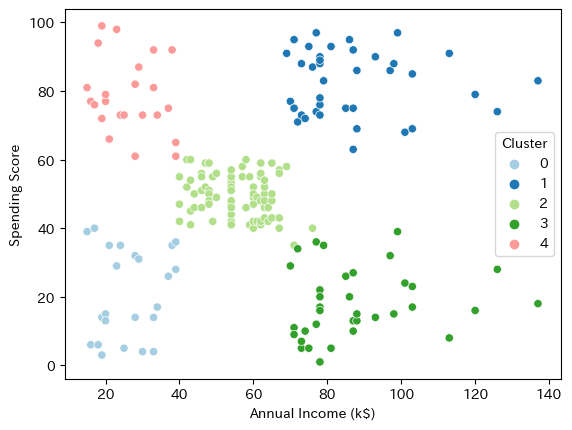

In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# number of clusters
k = 5

# k-means　clustering
X = df_2[["Age", "Annual_Income_(k$)", "Spending_Score", "Gender"]]
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get number of cluster
clusters = kmeans.predict(X)
df_3=df_2.copy()

# Output result
df_3["Cluster"] = clusters
print(df_3)

sns.scatterplot(data=df_3, x="Annual_Income_(k$)", y="Spending_Score", hue="Cluster", palette="Paired")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

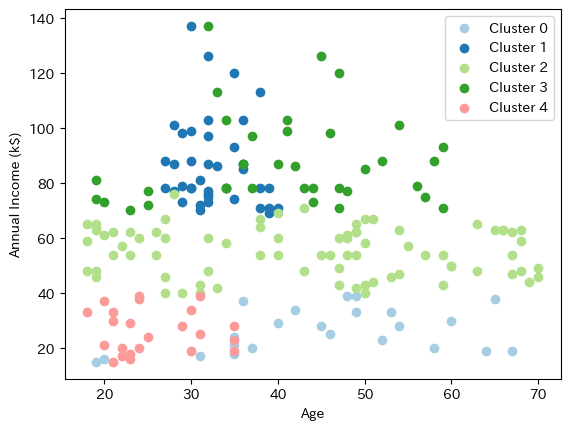

In [85]:
import matplotlib.pyplot as plt

plt.scatter(df_3[df_3['Cluster']==0]['Age'], df_3[df_3['Cluster']==0]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0')
plt.scatter(df_3[df_3['Cluster']==1]['Age'], df_3[df_3['Cluster']==1]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1')
plt.scatter(df_3[df_3['Cluster']==2]['Age'], df_3[df_3['Cluster']==2]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2')
plt.scatter(df_3[df_3['Cluster']==3]['Age'], df_3[df_3['Cluster']==3]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3')
plt.scatter(df_3[df_3['Cluster']==4]['Age'], df_3[df_3['Cluster']==4]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

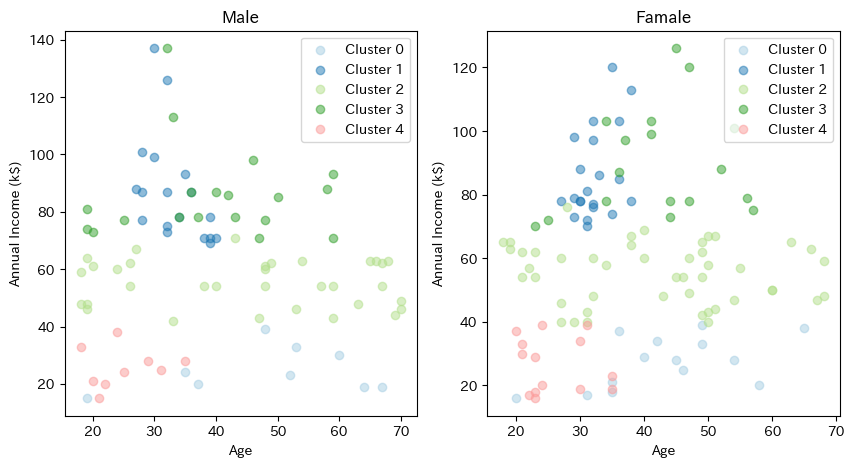

In [86]:
# Scatterplot of Male
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(df_3[(df_3['Cluster']==0) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==0) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==1) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==1) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==2) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==2) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==3) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==3) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==4) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==4) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4', alpha=0.5)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Annual Income (k$)')
ax[0].set_title('Male')
ax[0].legend()

# Scatterplot of famale
ax[1].scatter(df_3[(df_3['Cluster']==0) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==0) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==1) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==1) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==2) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==2) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==3) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==3) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==4) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==4) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4', alpha=0.5)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Annual Income (k$)')
ax[1].set_title('Famale')
ax[1].legend()

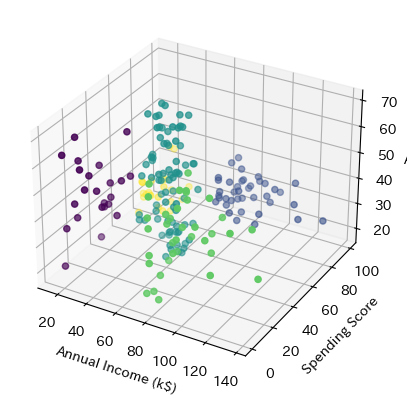

In [87]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_3['Annual_Income_(k$)']
y = df_3['Spending_Score']
z = df_3['Age']

ax.scatter(x, y, z, c=df_3['Cluster'])

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')

plt.show()

# agglomerative clustering

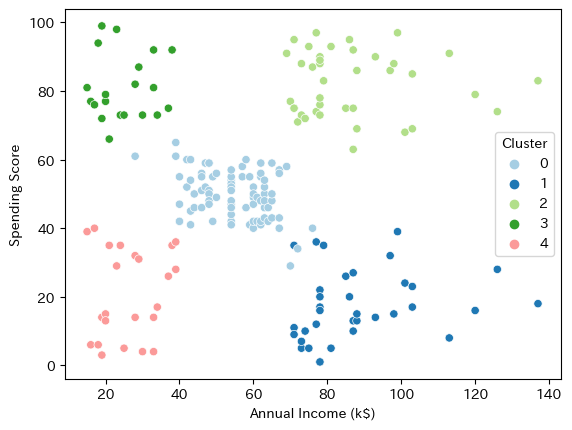

In [88]:
from sklearn.cluster import AgglomerativeClustering

# クラスタ数の指定
k = 5

# 凝集型クラスタリングの実行
X = df_2[["Age", "Annual_Income_(k$)", "Spending_Score", "Gender"]]
agg = AgglomerativeClustering(n_clusters=k).fit(X)

# クラスタ番号の取得
clusters = agg.labels_
df_3=df_2.copy()
df_3["Cluster"] = clusters

sns.scatterplot(data=df_3, x="Annual_Income_(k$)", y="Spending_Score", hue="Cluster", palette="Paired")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()